<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/EDA/Cat_Num_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical and Numerical Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

In [ ]:
telco_base_data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,NaN,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,NaN,2.0,125510.82,1,1,1,79084.10,0


Excited column tells us whether the customer left the company or still in the company

## Univariate Analysis

In [ ]:
telco_new = telco_base_data[['Geography','Gender','Exited']]
telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,NaN,0


In [ ]:
telco_new.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
2037*100/(2037+7963)

20.37

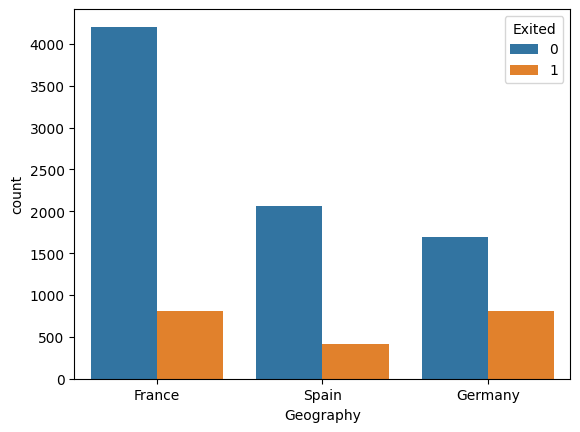

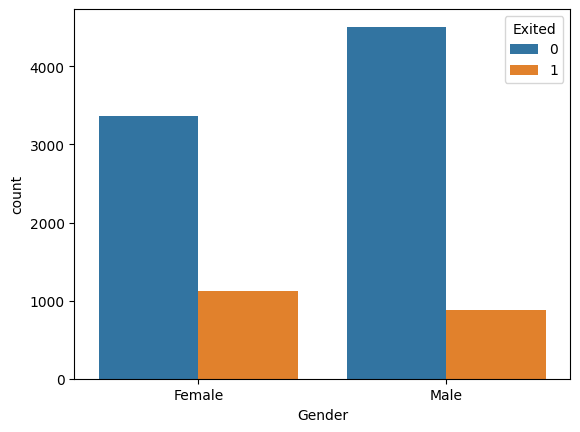

In [ ]:
for i,predictor in enumerate(telco_new.drop(columns=['Exited'])):
  plt.figure()
  sns.countplot(data=telco_new,x=predictor,hue='Exited')

Total churn ration is almost 20%
In the case of France it is 16%
In the case of Germany it is 32%
...by visually we can get some insights from that

If we see secod graph the churn rate of female ratio is more than the male

If there is no relation for a single feature we can't say that feature is nor useful
for example if the churn ratio of male and female is same as the ratio of male and female...we can't say that feature doesn't impact anything ...by combining thhe features it may impact

## Bivariate Analysis

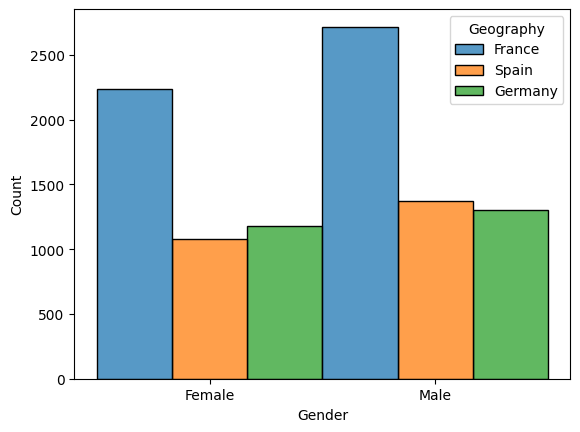

In [ ]:
_=sns.histplot(x='Gender',hue='Geography',data=telco_new,stat='count',multiple='dodge')

In [ ]:
telco_new_target1 = telco_new[telco_new['Exited']==1]

<Axes: xlabel='Gender', ylabel='Count'>

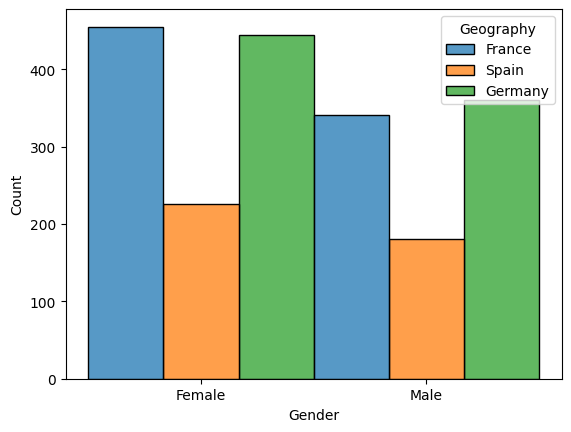

In [ ]:
sns.histplot(x='Gender',hue='Geography',data=telco_new_target1,stat='count',multiple='dodge')

We can say that females in Germany have more churn ratio

## Numerical Analysis

***Correlation***: It ranges from -1 to +1
+1 --> Positive correlation
-1 --> Negative correlation
0 --> No correlation

In [ ]:
telco_num = telco_base_data.select_dtypes(include='number')
telco_num.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000684,-0.006437,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009678,-0.014920,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003979,0.000885,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000684,0.009678,-0.003979,1.000000,-0.011087,0.029522,-0.030566,-0.012519,0.086072,-0.005413,0.285326
Tenure,-0.006437,-0.014920,0.000885,-0.011087,1.000000,-0.012268,0.013417,0.022639,-0.028329,0.007796,-0.013984
Balance,-0.009067,-0.012419,0.006268,0.029522,-0.012268,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030566,0.013417,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.012519,0.022639,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.086072,-0.028329,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.005413,0.007796,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Age is more positively correlated

<Axes: >

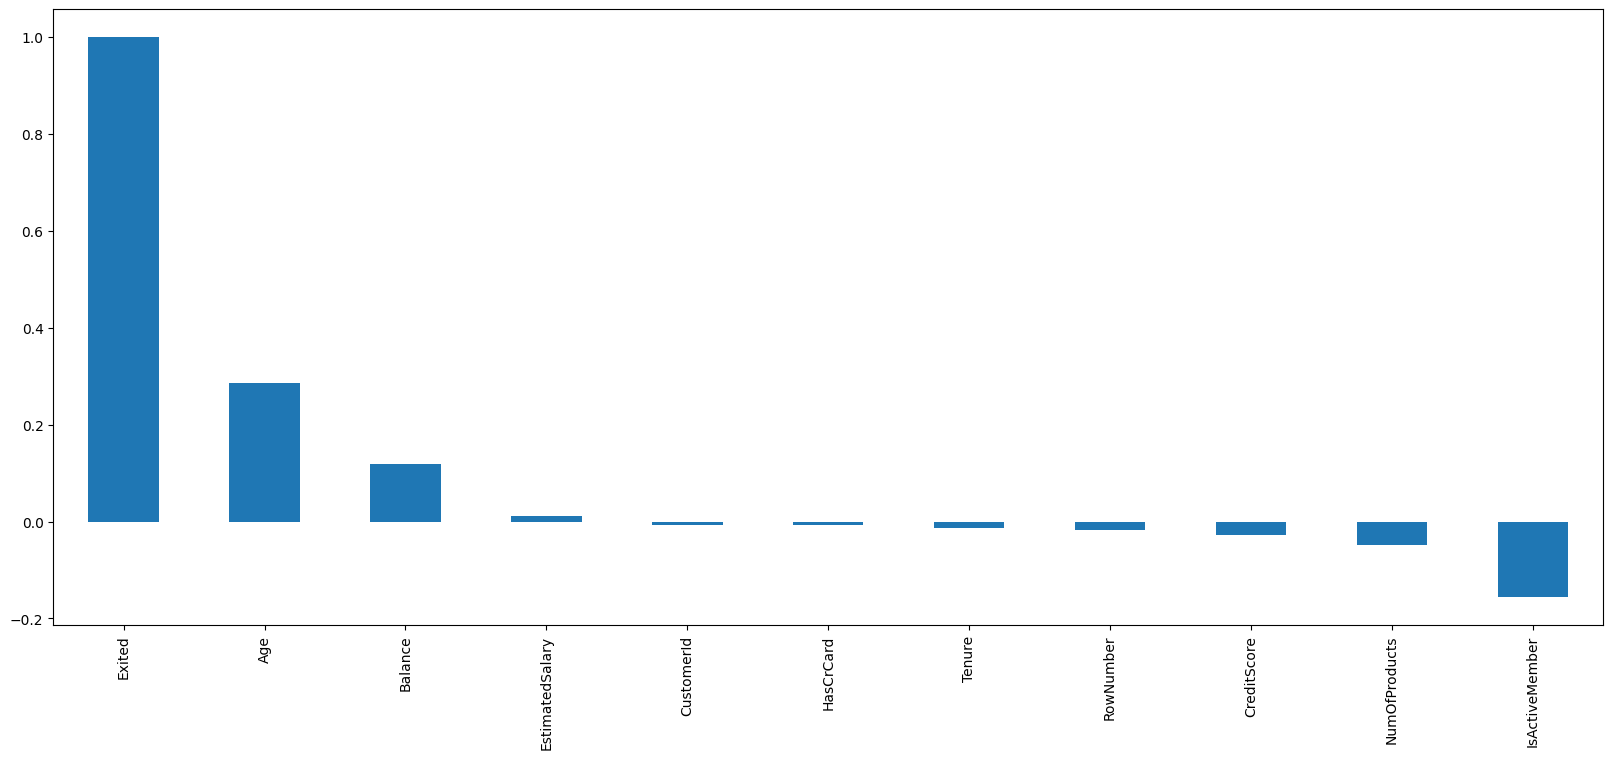

In [ ]:
plt.figure(figsize=(20,8))
telco_num.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

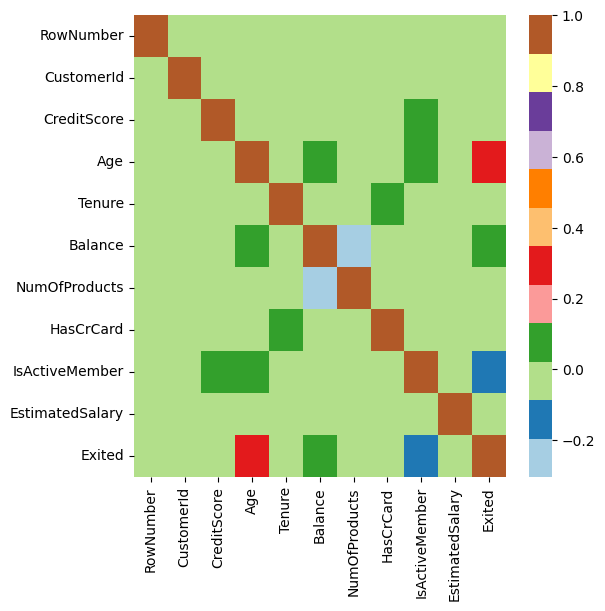

In [ ]:
plt.figure(figsize=(6,6))
_=sns.heatmap(data=telco_num.corr(),cmap='Paired')

In [ ]:
telco_base_data['Age'].value_counts().sort_index()

,count
Age,
18.0,22
19.0,27
20.0,39
21.0,51
22.0,82
...,...
83.0,1
84.0,2
85.0,1


<Axes: xlabel='Age'>

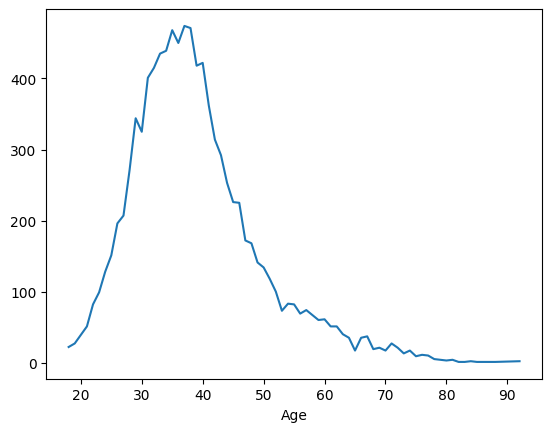

In [ ]:
telco_base_data['Age'].value_counts().sort_index().plot()

In [ ]:
telco_base_data_1 = telco_base_data[telco_base_data['Exited']==1]

<Axes: xlabel='Age'>

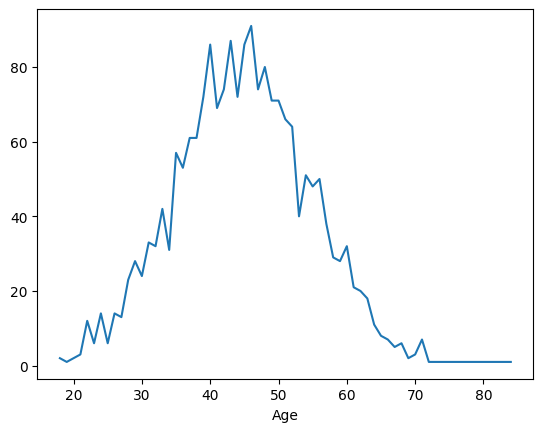

In [ ]:
telco_base_data_1['Age'].value_counts().sort_index().plot()

<ipython-input-63-809689aa792a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data.Exited==0)],color='Red',shade=True)
<ipython-input-63-809689aa792a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data.Exited==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Age by churn')

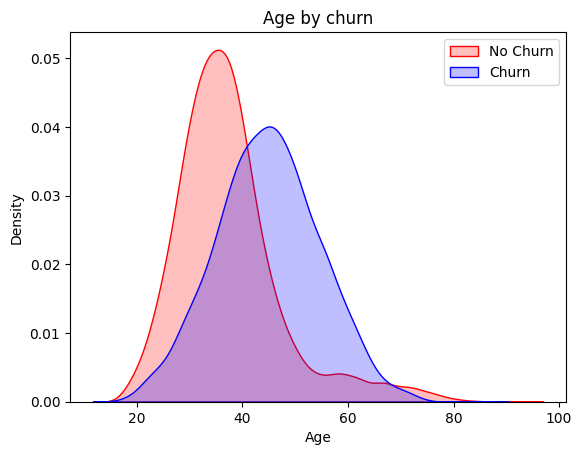

In [ ]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data.Exited==0)],color='Red',shade=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data.Exited==1)],color='Blue',shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

We can see that more aged people are likely to churn because the maximum peak i.e. the maximum of the churning people's graph is shifted towards right

<ipython-input-67-edf1f145f89b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data.Exited==0)],color='Red',shade=True)
<ipython-input-67-edf1f145f89b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data.Exited==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Tenure by churn')

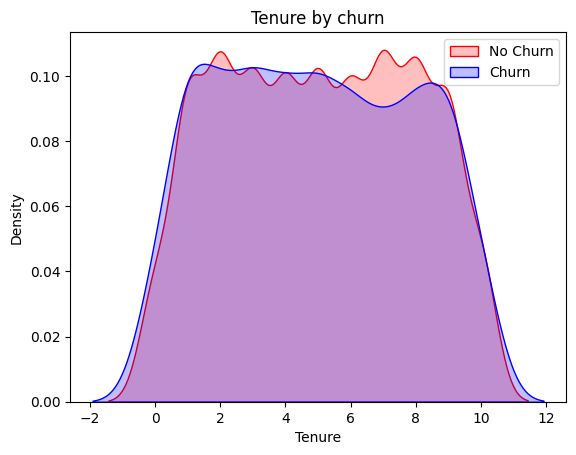

In [ ]:
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data.Exited==0)],color='Red',shade=True)
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data.Exited==1)],color='Blue',shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

No difference can be observed

<ipython-input-66-8e5732c55cc9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data.Exited==0)],color='Red',shade=True)
<ipython-input-66-8e5732c55cc9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data.Exited==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Balance by churn')

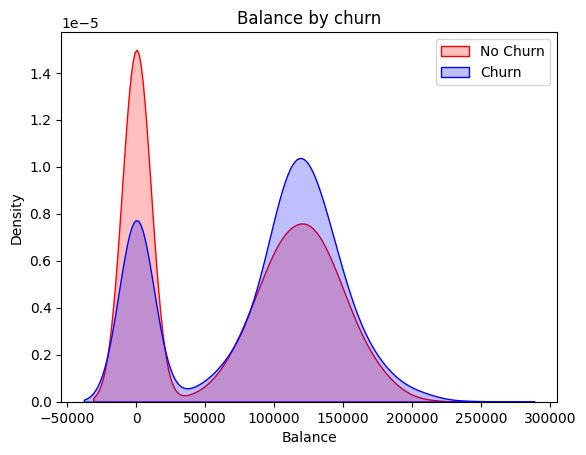

In [ ]:
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data.Exited==0)],color='Red',shade=True)
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data.Exited==1)],color='Blue',shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')

We can say the people with low balance are less churning and the people with more balance arer likely to churn